In [1]:
# Setup:
# 1. Uninstall previous version if already installed
%pip uninstall pyafmreader -y
# 2. Install pyafmreader from github 
# (temporary, when 1.0 releases it will be available via pip)
%pip install git+https://github.com/jlopezalo/pyafmreader.git

Found existing installation: pyafmreader x.x.x
Uninstalling pyafmreader-x.x.x:
  Successfully uninstalled pyafmreader-x.x.x
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmreader.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-zp3vf0xr
  Running command git clone -q https://github.com/jlopezalo/pyafmreader.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-zp3vf0xr
  Cloning https://github.com/TkTech/fasterzip.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-7yma1e4n/fasterzip_987ffb18521549c080062416a509a4b3
  Running command git clone -q https://github.com/TkTech/fasterzip.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-7yma1e4n/fasterzip_987ffb18521549c080062416a509a4b3
  Created wheel for pyafmreader: filename=pyafmreader-x.x.x-py3-none-any.whl size=26225 sha256=0e2723f2c3dcc8b2e1f202b45364382f2fee66918ca2a3731c9db8e

In [2]:
# 1. Import pyafmreader loadfile and matplotlib
from pyafmreader import loadfile
import matplotlib.pyplot as plt

# Get documentation about loadfile function
help(loadfile)

Help on function loadfile in module pyafmreader.pyafmreader:

loadfile(filepath)
    Load AFM file. 
    
    Supported formats:
        - JPK --> .jpk-force, .jpk-force-map, .jpk-qi-data
        - JPK Thermal --> .tnd
        - NANOSCOPE --> .spm, .pfc
        - UFF --> .uff
    
            Parameters:
                    filepath (str): Path to the file.
            
            Returns:
                    If JPK, NANOSCOPE OR UFF:
                        UFF (uff.UFF): Universal File Format object containing loaded data.
                    If JPK Thermal:
                        Amplitude (m^2/V) (np.array),
                        Frequencies (Hz) (np.array),
                        Fit-Data (m^2/V) (np.array),
                        Parameters (dict)



In [5]:
# 2. Load one of the test files
TEST_FILE_PATH = '/Users/javierlopez/Documents/Marseille/05-11-2021/Rheo/map-data-2021.11.05-17.37.44.432.jpk-force-map'

TEST_FILE = loadfile(TEST_FILE_PATH)

type(TEST_FILE)

pyafmreader.uff.UFF

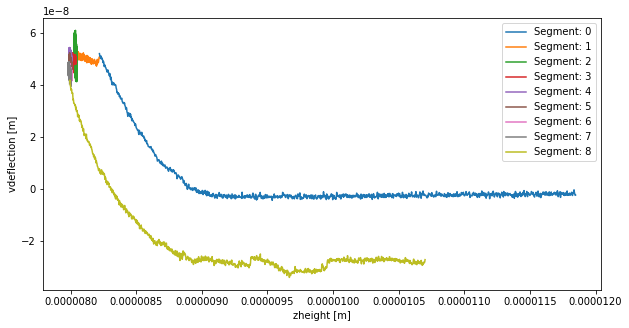

In [11]:
metadata = TEST_FILE.filemetadata
FC = TEST_FILE.getcurve(0)
defl_sens = metadata['defl_sens_nmbyV'] / 1e09 # nm/V --> m/V
height_channel_key = metadata['height_channel_key']
FC.preprocess_force_curve(defl_sens, height_channel_key)
plt.figure(figsize=(10,5))
for segid, segment in FC.get_segments():
    plt.plot(segment.zheight, segment.vdeflection, label=f'Segment: {segid}')
plt.xlabel('zheight [m]')
plt.ylabel('vdeflection [m]')
plt.legend()
plt.show()

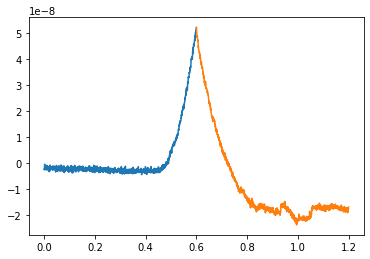

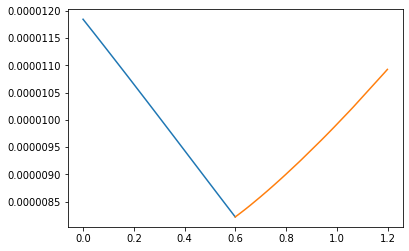

In [34]:
segments = FC.get_segments()
app = segments[0][-1]
ret = segments[-1][-1]
offset_deflection = app.vdeflection[-1] - ret.vdeflection[0]
offset_zheight = app.zheight[-1] - ret.zheight[0]

plt.plot(app.time, app.vdeflection)
plt.plot(ret.time + app.time[-1], ret.vdeflection + offset_deflection)
plt.show()

plt.plot(app.time, app.zheight)
plt.plot(ret.time + app.time[-1], ret.zheight + offset_zheight)
plt.show()